In [1]:
from modsim import *
import random

ModuleNotFoundError: No module named 'modsim'

### Modelling and Simmulation [  SeWeK  ]

In [ ]:
# Deklarasi populasi awal setiap tempat
sewek = State(swk=0, itts=30, unesa=50, other=70, dine_in=0, not_dine_in=0)
place = [sewek.itts, sewek.unesa, sewek.other]


In [ ]:

def go_to_swk(people, status, place_name):
    if status == sewek.dine_in:
        if sewek.swk == 120:
            return
        else :
            sewek.dine_in += people
    else :
        sewek.not_dine_in += people    
    
    if place_name == "ITTS" :
        sewek.itts -= people
    elif place_name == "UNESA" :
        sewek.unesa -= people
    elif place_name == "OTHER" :
        sewek.other -= people
            
    
    print(f"{people} people from {place_name} go to SWK")
    sewek.swk += people
        
    

        

In [ ]:
def exit_from_swk(people, status, place_name):
    if (sewek.swk == 0) or (sewek.swk < people):
        return
    
    if status == sewek.dine_in:
        sewek.dine_in -= people
    else :
        sewek.not_dine_in -= people    
        
    if place_name == "ITTS" :
        sewek.itts += people
    elif place_name == "UNESA" :
        sewek.unesa += people
    elif place_name == "OTHER" :
        sewek.other += people
        
    print(f"{people} people from {place_name} leave from SWK")
    sewek.swk -= people   

In [ ]:
results_itts = TimeSeries()
results_unesa = TimeSeries()
results_other = TimeSeries()
results_dine_in = TimeSeries()
results_not_dine_in = TimeSeries()
result_sewek = TimeSeries()

In [ ]:
results_itts[0] = sewek.itts
results_unesa[0] = sewek.unesa
results_other[0] = sewek.other
results_dine_in[0] = sewek.dine_in
results_not_dine_in[0] = sewek.not_dine_in
result_sewek[0] = sewek.swk

In [ ]:
for i in range(1, 61) : 
    rand_people = random.randint(1,5)
    rand_people2 = random.randint(1,5)
    if flip(0.5) : #dine-in
        # itts
        if flip(0.4):
            go_to_swk(rand_people, sewek.dine_in, "ITTS")
        elif flip(0.4) :
            exit_from_swk(rand_people2, sewek.dine_in, "ITTS")
        # unesa
        if flip(0.5):
            go_to_swk(rand_people, sewek.dine_in, "UNESA")
        elif flip(0.5) :
            exit_from_swk(rand_people2, sewek.dine_in, "UNESA")
        # other
        if flip(0.1):
            go_to_swk(rand_people, sewek.dine_in, "OTHER")
        elif flip(0.1) :
            exit_from_swk(rand_people2, sewek.dine_in, "OTHER")
    elif flip(0.5) : #dibungkus
        # itts
        if flip(0.4):
            go_to_swk(rand_people, sewek.not_dine_in, "ITTS")
        elif flip(0.1) :
            exit_from_swk(rand_people2, sewek.dine_in, "ITTS")
        # unesa
        if flip(0.5):
            go_to_swk(rand_people, sewek.not_dine_in, "UNESA")
        elif flip(0.5) :
            exit_from_swk(rand_people2, sewek.dine_in, "UNESA")
        # other
        if flip(0.1):
            go_to_swk(rand_people, sewek.not_dine_in, "OTHER")
        elif flip(0.1) :
            exit_from_swk(rand_people2, sewek.dine_in, "OTHER")
    

results_itts[i] = sewek.itts
results_unesa[i] = sewek.unesa
results_other[i] = sewek.other
results_dine_in[i] = sewek.dine_in
results_not_dine_in[i] = sewek.not_dine_in
result_sewek[i] = sewek.swk

4 people from ITTS go to SWK
4 people from UNESA go to SWK
1 people from ITTS go to SWK
4 people from UNESA leave from SWK
4 people from OTHER leave from SWK
5 people from ITTS leave from SWK
5 people from UNESA leave from SWK
3 people from ITTS go to SWK
3 people from OTHER go to SWK
2 people from UNESA leave from SWK
3 people from UNESA leave from SWK
1 people from ITTS go to SWK
1 people from UNESA go to SWK
3 people from ITTS go to SWK
3 people from UNESA go to SWK
5 people from UNESA leave from SWK
2 people from ITTS go to SWK
2 people from UNESA go to SWK
4 people from UNESA leave from SWK
4 people from OTHER leave from SWK
2 people from ITTS go to SWK
2 people from UNESA leave from SWK
4 people from ITTS leave from SWK
4 people from UNESA go to SWK
2 people from UNESA go to SWK
5 people from OTHER leave from SWK
1 people from ITTS go to SWK
1 people from UNESA go to SWK
1 people from ITTS leave from SWK
1 people from UNESA leave from SWK
1 people from OTHER leave from SWK
2 peop

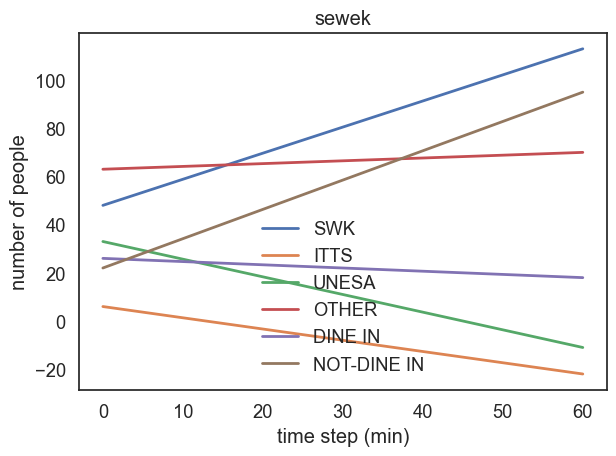

In [ ]:
result_sewek.plot(label="SWK")
results_itts.plot(label="ITTS")
results_unesa.plot(label="UNESA")
results_other.plot(label="OTHER")
results_dine_in.plot(label="DINE IN")
results_not_dine_in.plot(label="NOT-DINE IN")

decorate(
            title="sewek",
            xlabel="time step (min)",
            ylabel="number of people"
        )